In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def split_data_by_bands(filename):
    bands = []
    current_band_data = []

    with open(filename, 'r') as file:
        next(file)

        for line in file:
            if line.strip():  # Check if the line is not empty
                data = line.split()
                current_band_data.append([float(val) for val in data])
            else:
                bands.append(current_band_data)
                current_band_data = []

        if current_band_data:
            bands.append(current_band_data)

    return bands

# def filter_by_k_value(df, column_name, value):
def filter_by_k_value(df, column_name, k_min,k_max):
    """
    Filter the DataFrame `df` for rows where `column_name` matches `value`.

    Parameters:
        df (pd.DataFrame): The DataFrame to filter (e.g., cb1 or cb2).
        column_name (str): The name of the column to filter by ('kx' or 'ky').
        value (float): The value to filter for in the specified column.

    Returns:
        pd.DataFrame: A DataFrame containing only the rows where the column value matches the input.
    """
    if column_name not in ['kx', 'ky']:
        raise ValueError("Column name must be 'kx' or 'ky'")

    # filtered_df = df[df[column_name] == value]
    filtered_df = df[(df[column_name] >= k_min) & (df[column_name] <= k_max)]
    return filtered_df


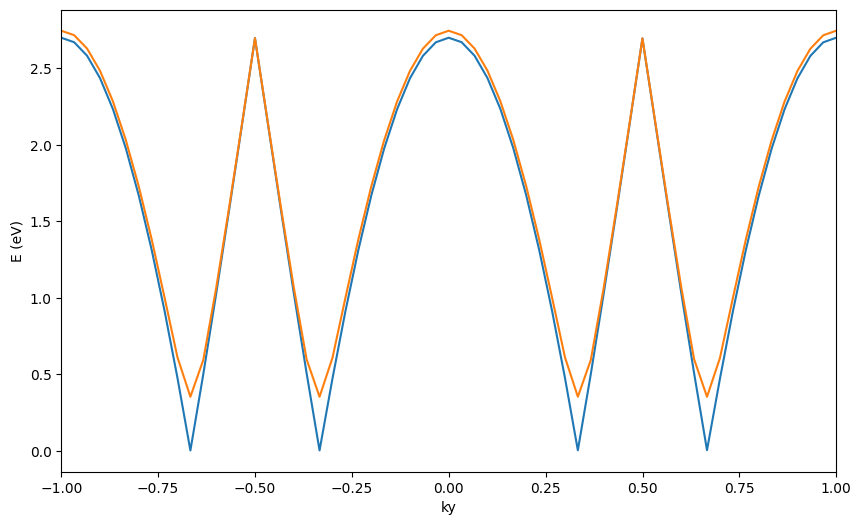

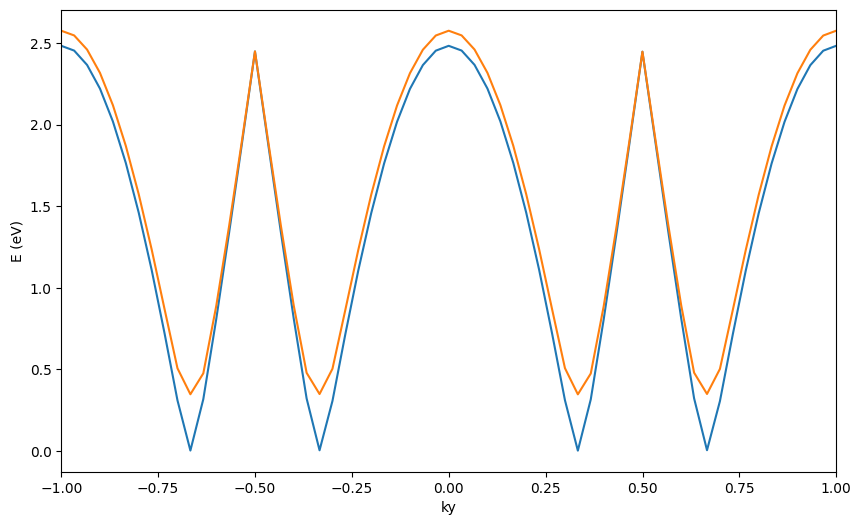

In [9]:
potentials = ['0','.5']
for potential in potentials:
    filename = f"potential_{potential}/bulkek.dat"
    bands = split_data_by_bands(filename)
    cb1 = bands[48]
    cb2 = bands[49]
    columns = ['kx', 'ky', 'kz', 'klen', 'energy']
    cb1_df = pd.DataFrame(cb1, columns=columns)
    cb2_df = pd.DataFrame(cb2, columns=columns)

    kx_value = 0
    cb1_filtered = filter_by_k_value(cb1_df, 'kx', kx_value)
    cb2_filtered = filter_by_k_value(cb2_df, 'kx', kx_value)
    diff = abs(cb2_filtered['energy']-cb1_filtered['energy'])

    plt.figure(figsize=(10, 6))
    plt.plot(cb1_filtered['ky'],cb1_filtered['energy'])
    plt.plot(cb2_filtered['ky'],cb2_filtered['energy'])
    plt.xlabel("ky")
    plt.ylabel("E (eV)")
    plt.xlim(-1,1)
    plt.show()


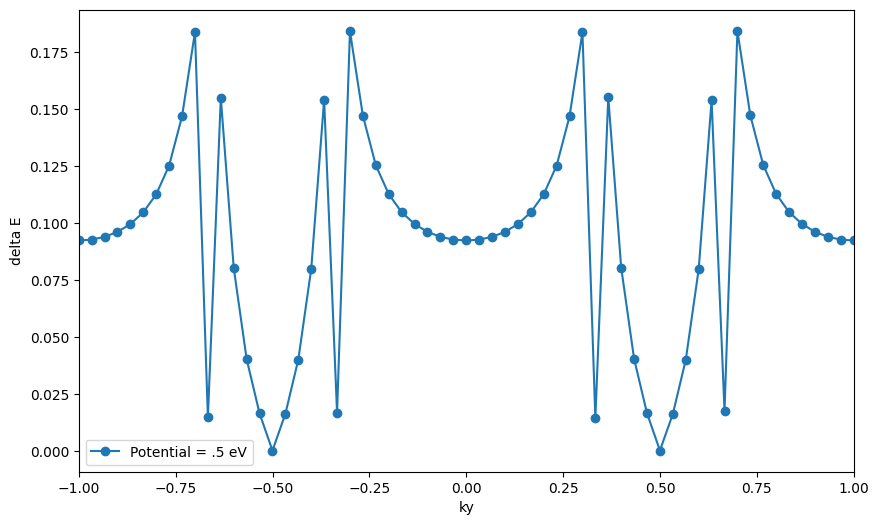

In [11]:
potentials = ['.5']
plt.figure(figsize=(10, 6))

for potential in potentials:
    filename = f"potential_{potential}/bulkek.dat"
    bands = split_data_by_bands(filename)
    cb1 = bands[48]
    cb2 = bands[49]
    columns = ['kx', 'ky', 'kz', 'klen', 'energy']
    cb1_df = pd.DataFrame(cb1, columns=columns)
    cb2_df = pd.DataFrame(cb2, columns=columns)

    kx_min = 0.52
    kx_max = 0.52
    cb1_filtered = filter_by_k_value(cb1_df, 'kx', kx_min,kx_max)
    cb2_filtered = filter_by_k_value(cb2_df, 'kx', kx_min,kx_max)
    diff = abs(cb2_filtered['energy']-cb1_filtered['energy'])

    plt.plot(cb1_filtered['ky'],diff,'o-',label=f"Potential = {potential} eV")

plt.xlabel("ky")
plt.ylabel("delta E")
plt.xlim(-1,1)
plt.legend()
plt.show()

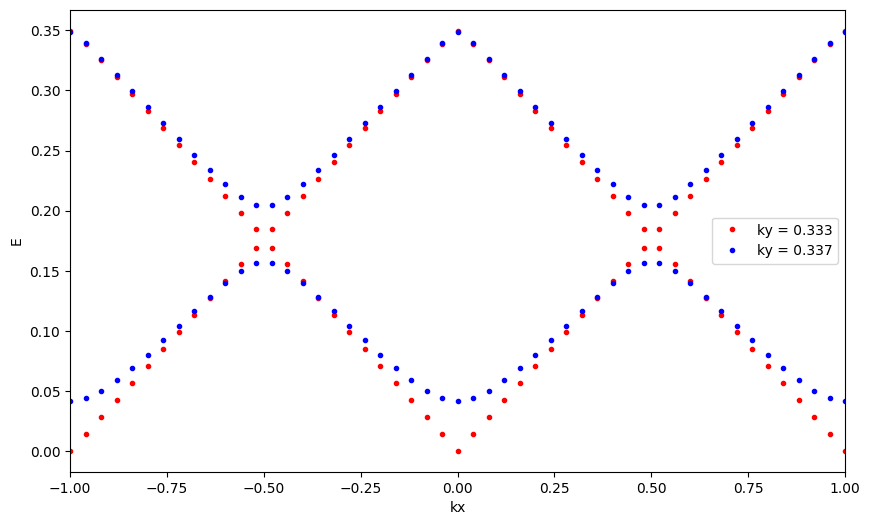

In [12]:
potentials = ['.3']
plt.figure(figsize=(10, 6))

columns = ['kx', 'ky', 'kz', 'klen', 'energy']

for potential in potentials:
    filename = f"potential_{potential}_dense_ky/bulkek.dat"
    bands = split_data_by_bands(filename)
    vb = bands[47]
    cb1 = bands[48]
    cb2 = bands[49]
    vb_df = pd.DataFrame(vb, columns=columns)
    cb1_df = pd.DataFrame(cb1, columns=columns)
    cb2_df = pd.DataFrame(cb2, columns=columns)

    ky_min = 0.333
    ky_max = 0.333
    vb_filtered = filter_by_k_value(vb_df, 'ky', ky_min,ky_max)
    cb1_filtered = filter_by_k_value(cb1_df, 'ky', ky_min,ky_max)
    cb2_filtered = filter_by_k_value(cb2_df, 'ky', ky_min,ky_max)

    plt.plot(cb1_filtered['kx'],cb1_filtered["energy"],'.',c="red",label="ky = 0.333")
    plt.plot(cb2_filtered['kx'],cb2_filtered["energy"],'.',c="red")

    ky_min = 0.337
    ky_max = 0.337
    vb_filtered = filter_by_k_value(vb_df, 'ky', ky_min,ky_max)
    cb1_filtered = filter_by_k_value(cb1_df, 'ky', ky_min,ky_max)
    cb2_filtered = filter_by_k_value(cb2_df, 'ky', ky_min,ky_max)

    plt.plot(cb1_filtered['kx'],cb1_filtered["energy"],'.',c="blue",label="ky = 0.337")
    plt.plot(cb2_filtered['kx'],cb2_filtered["energy"],'.',c="blue")

plt.xlabel("kx")
plt.ylabel("E")
plt.xlim(-1,1)
plt.legend()
plt.show()

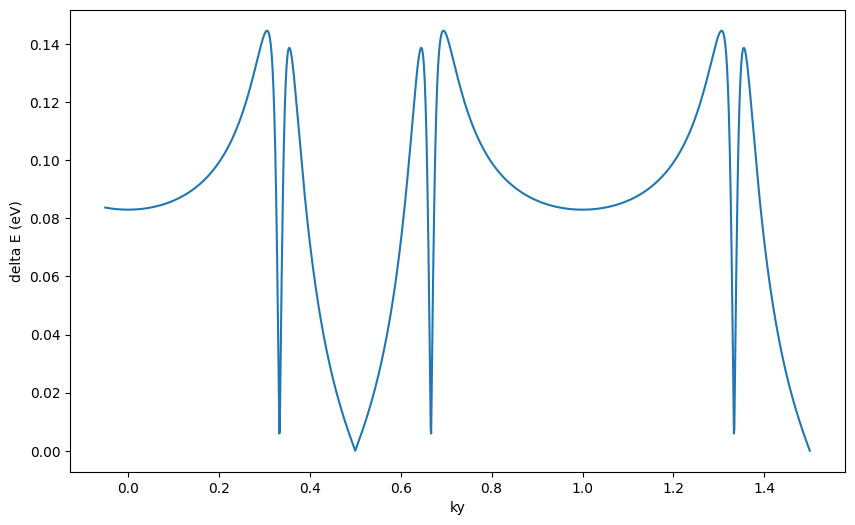

In [14]:
potentials = ['.3']
kx_min=0.5
kx_max=0.5
for potential in potentials:
    filename = f"potential_{potential}/bulkek.dat"
    bands = split_data_by_bands(filename)
    cb1 = bands[48]
    cb2 = bands[49]
    columns = ['kx', 'ky', 'kz', 'klen', 'energy']
    cb1_df = pd.DataFrame(cb1, columns=columns)
    cb2_df = pd.DataFrame(cb2, columns=columns)

    cb1_filtered = filter_by_k_value(cb1_df, 'kx',kx_min,kx_max)
    cb2_filtered = filter_by_k_value(cb2_df, 'kx',kx_min,kx_max)
    deltaE = cb2_filtered["energy"] - cb1_filtered["energy"]

    plt.figure(figsize=(10, 6))
    plt.plot(cb1_filtered['ky'],deltaE)
    plt.xlabel("ky")
    plt.ylabel("delta E (eV)")
    # plt.xlim(-1,1)
    plt.show()
